## Silicon (Si) BAND STRUCTURE

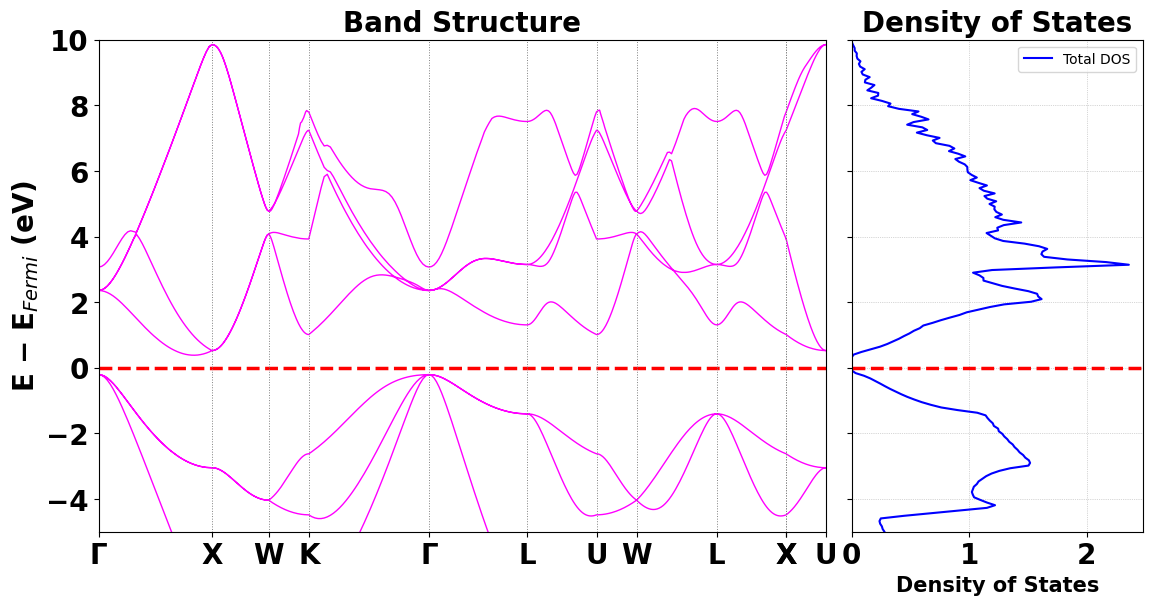

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec

# === Load Band Structure Data ===
bs_data = np.loadtxt("SiBS.dat")
k_points = bs_data[:, 0]
energies = bs_data[:, 1:]
num_bands = energies.shape[1]
fermi_level = 0.0

# Verify k-point range to avoid singular plot
if np.isclose(k_points.min(), k_points.max()):
    raise ValueError("All k-points have the same value. Check SiBS.dat content.")

# CBM and VBM
cbm = np.min(energies[energies > fermi_level])
vbm = np.max(energies[energies < fermi_level])
band_gap = cbm - vbm

# High-symmetry points
high_symmetry_labels = ['Γ', 'X', 'W', 'K', 'Γ', 'L', 'U', 'W', 'L', 'K', 'U', 'X']
spacing = 40
high_symmetry_points = [i * spacing for i in range(len(high_symmetry_labels))]
tick_positions = [k_points[i] for i in high_symmetry_points]

# === Load DOS Data ===
dos_data = np.loadtxt("TDOS.dat")
if dos_data.shape[1] == 3:
    energy = dos_data[:, 0]
    dos_up = dos_data[:, 1]
    dos_down = dos_data[:, 2]
    spin_polarized = True
elif dos_data.shape[1] == 2:
    energy = dos_data[:, 0]
    dos = dos_data[:, 1]
    spin_polarized = False
else:
    raise ValueError("Unexpected format in TDOS.dat")

# === Plot ===
fig = plt.figure(figsize=(12, 6))
gs = GridSpec(1, 2, width_ratios=[2.5, 1], wspace=0.05)

# --- Band Structure ---
ax1 = fig.add_subplot(gs[0])
for i in range(num_bands):
    ax1.plot(k_points, energies[:, i], color='fuchsia', lw=1)

ax1.axhline(fermi_level, color='red', linestyle='--', lw=2.5) # FOR FERMI LEVEL

for i in high_symmetry_points:
    ax1.axvline(x=k_points[i], color='gray', linestyle=':', lw=0.7)

ax1.set_xticks(tick_positions)
ax1.set_xticklabels(high_symmetry_labels, fontsize=20, weight='bold')
ax1.set_ylabel("E − E$_{Fermi}$ (eV)", fontsize=20, weight='bold')
ax1.set_xlim([k_points.min(), k_points.max()])
ax1.set_ylim([-5, 10])
ax1.set_title("Band Structure", fontsize=20, weight='bold')
ax1.tick_params(axis='y', labelsize=20)
for label in ax1.get_yticklabels():
    label.set_weight('bold')
ax1.tick_params(axis='x', labelsize=20)
for label in ax1.get_xticklabels():
    label.set_weight('bold')

# --- DOS Plot ---
ax2 = fig.add_subplot(gs[1], sharey=ax1)
if spin_polarized:
    ax2.plot(dos_up, energy, label="Spin Up", color='black')
    ax2.plot(-dos_down, energy, label="Spin Down", color='red')
else:
    ax2.plot(dos, energy, color='blue', label="Total DOS")

ax2.axhline(fermi_level, color='red', linestyle='--', lw=2.5) # FOR FERMI LEVEL
ax2.set_xlabel("Density of States", fontsize=15, weight='bold')  # ← Make label match font
ax2.set_xlim(left=0)
ax2.set_ylim([-5, 10])
ax2.tick_params(axis='x', labelsize=20)
for label in ax2.get_xticklabels():
    label.set_weight('bold')
ax2.tick_params(axis='y', labelleft=False)
ax2.legend()
ax2.grid(True, linestyle=':', linewidth=0.5)
ax2.set_title("Density of States", fontsize=20, weight='bold')

# === Final layout adjustment ===
fig.subplots_adjust(left=0.08, right=0.95, top=0.92, bottom=0.1)
plt.show()


## Sodium Chloride (NaCl) BAND STRUCTURE

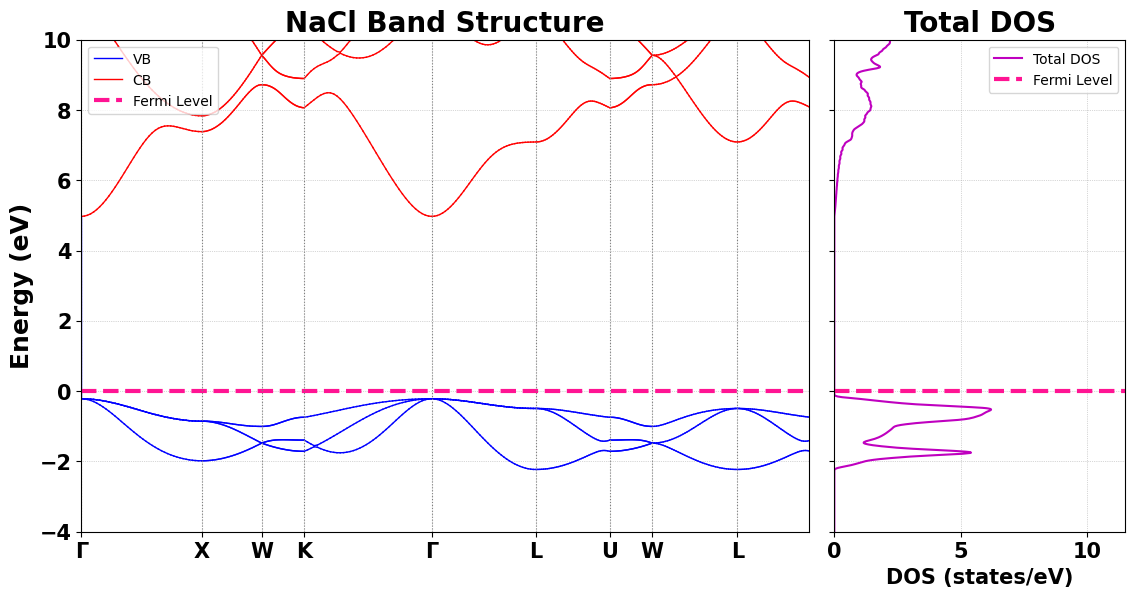

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec

# === Load Band Structure Data ===
bs_data = np.loadtxt("NaClBS.dat")
k_points = bs_data[:, 0]
energies = bs_data[:, 1:]
num_bands = energies.shape[1]
fermi_level = 0.0

# Calculate VBM and CBM
cbm = np.min(energies[energies > fermi_level])
vbm = np.max(energies[energies < fermi_level])
band_gap = cbm - vbm

# Define high-symmetry points and labels (40 k-points between each pair)
high_symmetry_labels = ['Γ', 'X', 'W', 'K', 'Γ', 'L', 'U', 'W', 'L', 'K', 'U', 'X']
spacing = 40
high_symmetry_points = [i * spacing for i in range(len(high_symmetry_labels))]
tick_positions = [k_points[i] for i in high_symmetry_points]

# === Load DOS Data ===
dos_data = np.loadtxt("naclDOS.dat")
if dos_data.shape[1] == 3:
    energy = dos_data[:, 0]
    dos_up = dos_data[:, 1]
    dos_down = dos_data[:, 2]
    spin_polarized = True
elif dos_data.shape[1] == 2:
    energy = dos_data[:, 0]
    dos = dos_data[:, 1]
    spin_polarized = False
else:
    raise ValueError("Unexpected file format in DOS file")

# === Plotting ===
fig = plt.figure(figsize=(12, 6))
gs = GridSpec(1, 2, width_ratios=[2.5, 1], wspace=0.05)

# --- Band Structure ---
ax1 = fig.add_subplot(gs[0])

# Flags to ensure labels are added only once to the legend
cb_label_added = False
vb_label_added = False

for i in range(num_bands):
    for j in range(len(k_points) - 1): # Iterate through points to apply color segment by segment
        if energies[j, i] >= fermi_level and energies[j+1, i] >= fermi_level:
            # Both points above or at Fermi level - plot as CB
            if not cb_label_added:
                ax1.plot(k_points[j:j+2], energies[j:j+2, i], color='red', lw=1, label='CB')
                cb_label_added = True
            else:
                ax1.plot(k_points[j:j+2], energies[j:j+2, i], color='red', lw=1)
        elif energies[j, i] <= fermi_level and energies[j+1, i] <= fermi_level:
            # Both points below or at Fermi level - plot as VB
            if not vb_label_added:
                ax1.plot(k_points[j:j+2], energies[j:j+2, i], color='blue', lw=1, label='VB')
                vb_label_added = True
            else:
                ax1.plot(k_points[j:j+2], energies[j:j+2, i], color='blue', lw=1)
        else:
            # The segment crosses the Fermi level. Plot the portion below as VB and above as CB
            # This is a more complex scenario, for simplicity, let's just plot the entire segment
            # with the color of the starting point, or the dominant part.
            # For a more accurate representation of the crossing point, interpolation would be needed.
            # Here, we'll plot based on the first point's relation to Fermi level.
            if energies[j, i] > fermi_level:
                if not cb_label_added:
                    ax1.plot(k_points[j:j+2], energies[j:j+2, i], color='red', lw=1, label='CB')
                    cb_label_added = True
                else:
                    ax1.plot(k_points[j:j+2], energies[j:j+2, i], color='red', lw=1)
            else:
                if not vb_label_added:
                    ax1.plot(k_points[j:j+2], energies[j:j+2, i], color='blue', lw=1, label='VB')
                    vb_label_added = True
                else:
                    ax1.plot(k_points[j:j+2], energies[j:j+2, i], color='blue', lw=1)


# Fermi level
ax1.axhline(fermi_level, color='deeppink', linestyle='--', linewidth=3, label='Fermi Level')

# Vertical symmetry lines
for i in high_symmetry_points:
    ax1.axvline(x=k_points[i], color='gray', linestyle=':', linewidth=0.8)

# Axis settings
ax1.set_xticks(tick_positions)
ax1.set_xticklabels(high_symmetry_labels, fontsize=15, weight='bold')
ax1.set_xlim([0, 6.8])
ax1.set_ylim([-4, 10])

ax1.tick_params(axis='y', labelsize=15)# for inc and making font of y axis points
for label in ax1.get_yticklabels():
    label.set_fontweight('bold')

ax1.set_ylabel("Energy (eV)", fontsize=18, weight='bold')
ax1.set_title(r"NaCl Band Structure", fontsize=20, weight='bold')
ax1.grid(True, linestyle=':', linewidth=0.5)
#ax1.set_facecolor("#f0f0f0")
ax1.legend(loc='upper left') # Add legend to ax1

# --- DOS Plot ---
ax2 = fig.add_subplot(gs[1], sharey=ax1)
if spin_polarized:
    ax2.plot(dos_up, energy, label='Spin Up', color='hotpink')
    ax2.plot(-dos_down, energy, label='Spin Down', color='red')
    ax2.set_xlabel("DOS (states/eV, Up / -Down)", fontsize=20, weight='bold')
else:
    ax2.plot(dos, energy, label='Total DOS', color='m')
    ax2.set_xlabel("DOS (states/eV)", fontsize=15, weight='bold')

ax2.axhline(y=0.0, color='deeppink', linestyle='--', linewidth=3, label='Fermi Level')
ax2.set_xlim(left=0)
ax2.set_ylim([-4, 10])


ax2.tick_params(axis='x', labelsize=15)
for label in ax2.get_xticklabels():
    label.set_fontweight('bold')

ax2.tick_params(axis='y', labelleft=False)
ax2.set_title("Total DOS", fontsize=20, weight='bold')
ax2.grid(True, linestyle=':', linewidth=0.5)
ax2.legend()
#ax2.set_facecolor("#f0f0f0")

# Final layout
fig.subplots_adjust(left=0.08, right=0.95, top=0.92, bottom=0.1)
plt.show()

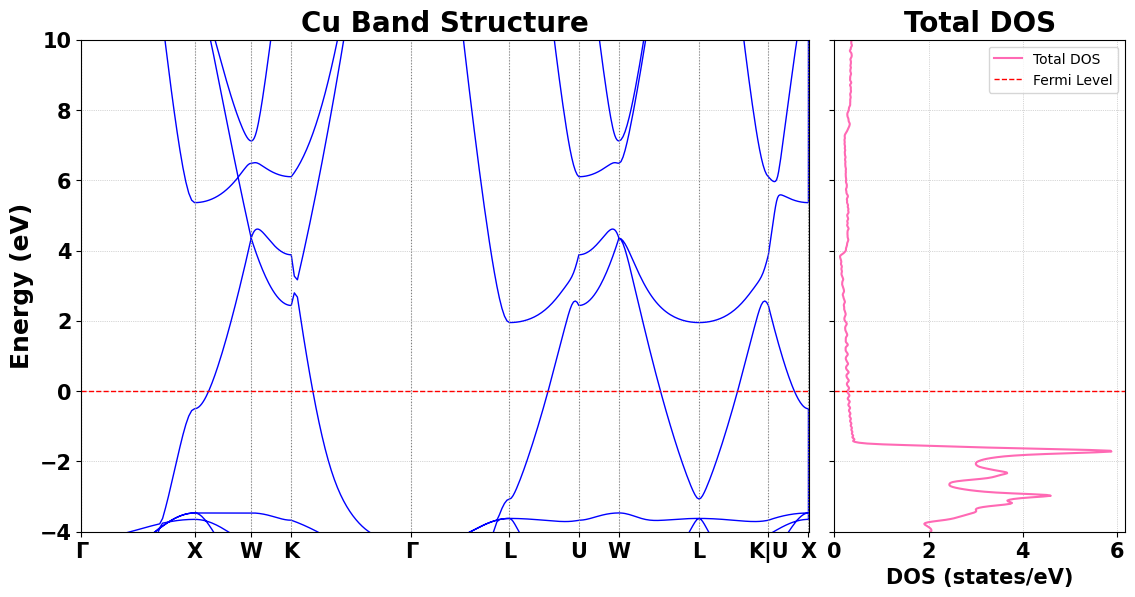

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec

# === Load Band Structure Data ===
bs_data = np.loadtxt("CuBS.dat")
k_points = bs_data[:, 0]
energies = bs_data[:, 1:]
num_bands = energies.shape[1]
fermi_level = 0.0

# Calculate VBM and CBM
cbm = np.min(energies[energies > fermi_level])
vbm = np.max(energies[energies < fermi_level])
band_gap = cbm - vbm

# Define high-symmetry points and labels (40 k-points between each pair)
high_symmetry_labels = ['Γ', 'X', 'W', 'K', 'Γ', 'L', 'U', 'W', 'L', 'K|U', 'X']
spacing = 40
high_symmetry_points = [i * spacing for i in range(len(high_symmetry_labels))]
tick_positions = [k_points[i] for i in high_symmetry_points]

# === Load DOS Data ===
dos_data = np.loadtxt("CuDOS.dat")
if dos_data.shape[1] == 3:
    energy = dos_data[:, 0]
    dos_up = dos_data[:, 1]
    dos_down = dos_data[:, 2]
    spin_polarized = True
elif dos_data.shape[1] == 2:
    energy = dos_data[:, 0]
    dos = dos_data[:, 1]
    spin_polarized = False
else:
    raise ValueError("Unexpected file format in DOS file")

# === Plotting ===
fig = plt.figure(figsize=(12, 6))
gs = GridSpec(1, 2, width_ratios=[2.5, 1], wspace=0.05)

# --- Band Structure ---
ax1 = fig.add_subplot(gs[0])
for i in range(num_bands):
    ax1.plot(k_points, energies[:, i], color='blue', lw=1)

# Fermi level
ax1.axhline(fermi_level, color='red', linestyle='--', linewidth=1)

# Vertical symmetry lines
for i in high_symmetry_points:
    ax1.axvline(x=k_points[i], color='gray', linestyle=':', linewidth=0.8)



# Axis settings
ax1.set_xticks(tick_positions)
ax1.set_xticklabels(high_symmetry_labels, fontsize=15, weight='bold')
ax1.set_xlim([0, 11.28])
ax1.set_ylim([-4, 10])

ax1.tick_params(axis='y', labelsize=15)# for inc and making font of y axis points 
for label in ax1.get_yticklabels():
    label.set_fontweight('bold')


ax1.set_ylabel("Energy (eV)", fontsize=18, weight='bold')
ax1.set_title(r"Cu Band Structure", fontsize=20, weight='bold')
ax1.grid(True, linestyle=':', linewidth=0.5)
#ax1.set_facecolor("#f0f0f0")

# --- DOS Plot ---
ax2 = fig.add_subplot(gs[1], sharey=ax1)
if spin_polarized:
    ax2.plot(dos_up, energy, label='Spin Up', color='hotpink')
    ax2.plot(-dos_down, energy, label='Spin Down', color='red')
    ax2.set_xlabel("DOS (states/eV, Up / -Down)", fontsize=20, weight='bold')
else:
    ax2.plot(dos, energy, label='Total DOS', color='hotpink')
    ax2.set_xlabel("DOS (states/eV)", fontsize=15, weight='bold')

ax2.axhline(y=0.0, color='red', linestyle='--', linewidth=1, label='Fermi Level')
ax2.set_xlim(left=0)
ax2.set_ylim([-4, 10])


ax2.tick_params(axis='x', labelsize=15)
for label in ax2.get_xticklabels():
    label.set_fontweight('bold')


ax2.tick_params(axis='y', labelleft=False)
ax2.set_title("Total DOS", fontsize=20, weight='bold')
ax2.grid(True, linestyle=':', linewidth=0.5)
ax2.legend()
#ax2.set_facecolor("#f0f0f0")

# Final layout
fig.subplots_adjust(left=0.08, right=0.95, top=0.92, bottom=0.1)
plt.show()


# Band Structure of MoS₂ (Bulk)
#  Space Group P6₃/mmc


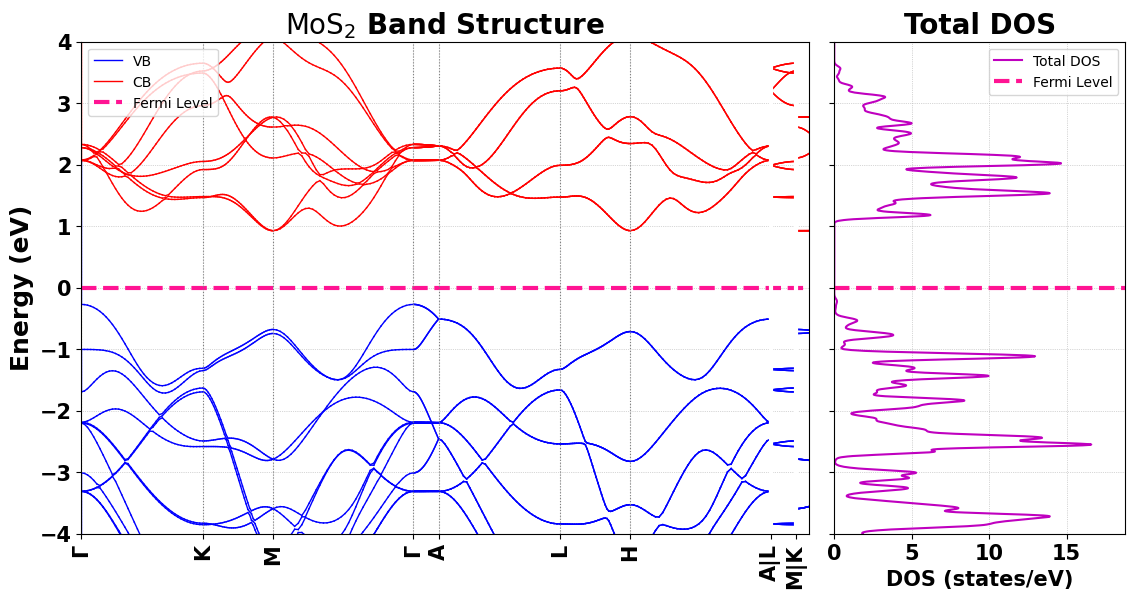

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec

# === Load Band Structure Data ===
bs_data = np.loadtxt("bulkBS.dat")
k_points = bs_data[:, 0]
energies = bs_data[:, 1:]
num_bands = energies.shape[1]
fermi_level = 0.0

# Calculate VBM and CBM
cbm = np.min(energies[energies > fermi_level])
vbm = np.max(energies[energies < fermi_level])
band_gap = cbm - vbm

# Define high-symmetry labels and spacing
high_symmetry_labels = ['Γ', 'K', 'M', 'Γ', 'A', 'L', 'H', 'A|L', 'M|K', 'H']
spacing = 40
high_symmetry_points = [i * spacing for i in range(len(high_symmetry_labels))]
tick_positions = [k_points[i] for i in high_symmetry_points]

# === Load DOS Data ===
dos_data = np.loadtxt("bulkDOS.dat")
if dos_data.shape[1] == 3:
    energy = dos_data[:, 0]
    dos_up = dos_data[:, 1]
    dos_down = dos_data[:, 2]
    spin_polarized = True
elif dos_data.shape[1] == 2:
    energy = dos_data[:, 0]
    dos = dos_data[:, 1]
    spin_polarized = False
else:
    raise ValueError("Unexpected file format in DOS file")

# === Plotting ===
fig = plt.figure(figsize=(12, 6))
gs = GridSpec(1, 2, width_ratios=[2.5, 1], wspace=0.05)

# --- Band Structure ---
ax1 = fig.add_subplot(gs[0])

# Flags to ensure labels are added only once to the legend
cb_label_added = False
vb_label_added = False

for i in range(num_bands):
    for j in range(len(k_points) - 1): # Iterate through points to apply color segment by segment
        if energies[j, i] >= fermi_level and energies[j+1, i] >= fermi_level:
            # Both points above or at Fermi level - plot as CB
            if not cb_label_added:
                ax1.plot(k_points[j:j+2], energies[j:j+2, i], color='red', lw=1, label='CB')
                cb_label_added = True
            else:
                ax1.plot(k_points[j:j+2], energies[j:j+2, i], color='red', lw=1)
        elif energies[j, i] <= fermi_level and energies[j+1, i] <= fermi_level:
            # Both points below or at Fermi level - plot as VB
            if not vb_label_added:
                ax1.plot(k_points[j:j+2], energies[j:j+2, i], color='blue', lw=1, label='VB')
                vb_label_added = True
            else:
                ax1.plot(k_points[j:j+2], energies[j:j+2, i], color='blue', lw=1)
        else:
            # The segment crosses the Fermi level. Plot the portion below as VB and above as CB
            # This is a more complex scenario, for simplicity, let's just plot the entire segment
            # with the color of the starting point, or the dominant part.
            # For a more accurate representation of the crossing point, interpolation would be needed.
            # Here, we'll plot based on the first point's relation to Fermi level.
            if energies[j, i] > fermi_level:
                if not cb_label_added:
                    ax1.plot(k_points[j:j+2], energies[j:j+2, i], color='red', lw=1, label='CB')
                    cb_label_added = True
                else:
                    ax1.plot(k_points[j:j+2], energies[j:j+2, i], color='red', lw=1)
            else:
                if not vb_label_added:
                    ax1.plot(k_points[j:j+2], energies[j:j+2, i], color='blue', lw=1, label='VB')
                    vb_label_added = True
                else:
                    ax1.plot(k_points[j:j+2], energies[j:j+2, i], color='blue', lw=1)


# Fermi level
ax1.axhline(fermi_level, color='deeppink', linestyle='--', linewidth=3, label='Fermi Level')

# Vertical symmetry lines
for i in high_symmetry_points:
    ax1.axvline(x=k_points[i], color='gray', linestyle=':', linewidth=0.8)

# Additional custom vertical lines
ax1.axvline(x=6.45, color='white', linestyle='-', linewidth=3)
ax1.axvline(x=6.68, color='white', linestyle='-', linewidth=3)

# Axis settings
ax1.set_xticks(tick_positions)
ax1.set_xticklabels(high_symmetry_labels, fontsize=15, weight='bold', rotation=90)
ax1.set_xlim([0, 6.8])
ax1.set_ylim([-4, 4])

ax1.tick_params(axis='y', labelsize=15)# for inc and making font of y axis points
for label in ax1.get_yticklabels():
    label.set_fontweight('bold')

ax1.set_ylabel("Energy (eV)", fontsize=18, weight='bold')
ax1.set_title(r"$\mathrm{MoS_2}$ Band Structure", fontsize=20, weight='bold')
ax1.grid(True, linestyle=':', linewidth=0.5)
#ax1.set_facecolor("#f0f0f0")
ax1.legend(loc='upper left') # Add legend to ax1

# --- DOS Plot ---
ax2 = fig.add_subplot(gs[1], sharey=ax1)
if spin_polarized:
    ax2.plot(dos_up, energy, label='Spin Up', color='hotpink')
    ax2.plot(-dos_down, energy, label='Spin Down', color='red')
    ax2.set_xlabel("DOS (states/eV, Up / -Down)", fontsize=20, weight='bold')
else:
    ax2.plot(dos, energy, label='Total DOS', color='m')
    ax2.set_xlabel("DOS (states/eV)", fontsize=15, weight='bold')

ax2.axhline(y=0.0, color='deeppink', linestyle='--', linewidth=3, label='Fermi Level')
ax2.set_xlim(left=0)
ax2.set_ylim([-4, 4])


ax2.tick_params(axis='x', labelsize=15)
for label in ax2.get_xticklabels():
    label.set_fontweight('bold')

ax2.tick_params(axis='y', labelleft=False)
ax2.set_title("Total DOS", fontsize=20, weight='bold')
ax2.grid(True, linestyle=':', linewidth=0.5)
ax2.legend()
#ax2.set_facecolor("#f0f0f0")

# Final layout
fig.subplots_adjust(left=0.08, right=0.95, top=0.92, bottom=0.1)
plt.show()

# Band Structure of MoS₂ (Monolayer)
# Space Group: P6̅m2




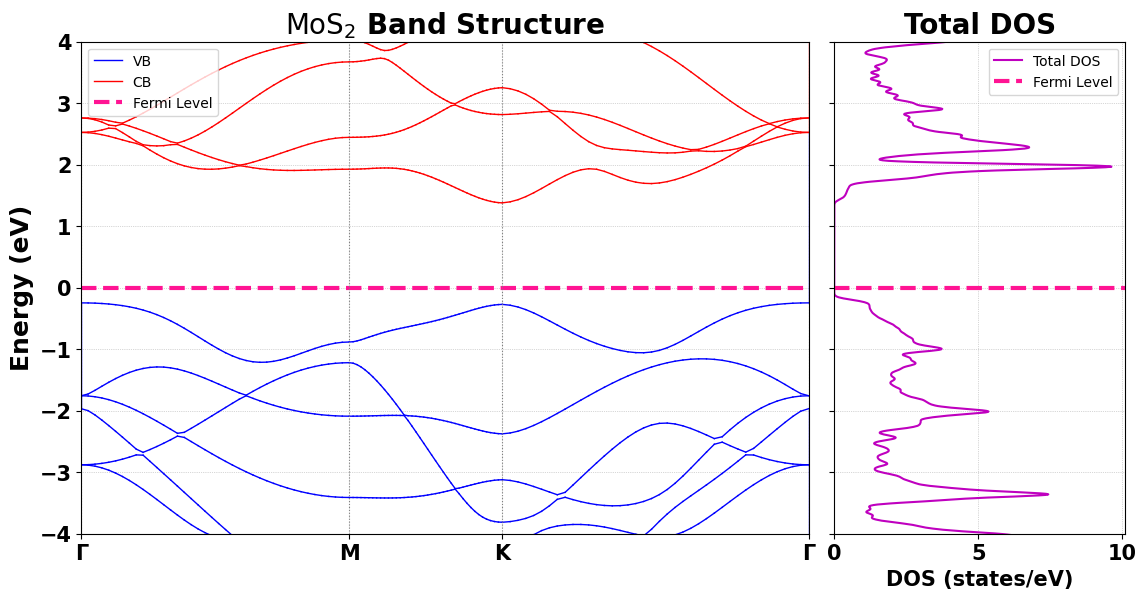

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec

# === Load Band Structure Data ===
bs_data = np.loadtxt("monolayer2.dat")
k_points = bs_data[:, 0]
energies = bs_data[:, 1:]
num_bands = energies.shape[1]
fermi_level = 0.0

# Calculate VBM and CBM
cbm = np.min(energies[energies > fermi_level])
vbm = np.max(energies[energies < fermi_level])
band_gap = cbm - vbm

# Define high-symmetry labels and spacing
high_symmetry_labels = ['Γ', 'M', 'K', 'Γ']
spacing = 40
high_symmetry_points = [i * spacing for i in range(len(high_symmetry_labels))]
tick_positions = [k_points[i] for i in high_symmetry_points]

# === Load DOS Data ===
dos_data = np.loadtxt("MoS2_P6m2.dat")
if dos_data.shape[1] == 3:
    energy = dos_data[:, 0]
    dos_up = dos_data[:, 1]
    dos_down = dos_data[:, 2]
    spin_polarized = True
elif dos_data.shape[1] == 2:
    energy = dos_data[:, 0]
    dos = dos_data[:, 1]
    spin_polarized = False
else:
    raise ValueError("Unexpected file format in DOS file")

# === Plotting ===
fig = plt.figure(figsize=(12, 6))
gs = GridSpec(1, 2, width_ratios=[2.5, 1], wspace=0.05)

# --- Band Structure ---
ax1 = fig.add_subplot(gs[0])

# Flags to ensure labels are added only once to the legend
cb_label_added = False
vb_label_added = False

for i in range(num_bands):
    for j in range(len(k_points) - 1): # Iterate through points to apply color segment by segment
        if energies[j, i] >= fermi_level and energies[j+1, i] >= fermi_level:
            # Both points above or at Fermi level - plot as CB
            if not cb_label_added:
                ax1.plot(k_points[j:j+2], energies[j:j+2, i], color='red', lw=1, label='CB')
                cb_label_added = True
            else:
                ax1.plot(k_points[j:j+2], energies[j:j+2, i], color='red', lw=1)
        elif energies[j, i] <= fermi_level and energies[j+1, i] <= fermi_level:
            # Both points below or at Fermi level - plot as VB
            if not vb_label_added:
                ax1.plot(k_points[j:j+2], energies[j:j+2, i], color='blue', lw=1, label='VB')
                vb_label_added = True
            else:
                ax1.plot(k_points[j:j+2], energies[j:j+2, i], color='blue', lw=1)
        else:
            # The segment crosses the Fermi level. Plot the portion below as VB and above as CB
            # This is a more complex scenario, for simplicity, let's just plot the entire segment
            # with the color of the starting point, or the dominant part.
            # For a more accurate representation of the crossing point, interpolation would be needed.
            # Here, we'll plot based on the first point's relation to Fermi level.
            if energies[j, i] > fermi_level:
                if not cb_label_added:
                    ax1.plot(k_points[j:j+2], energies[j:j+2, i], color='red', lw=1, label='CB')
                    cb_label_added = True
                else:
                    ax1.plot(k_points[j:j+2], energies[j:j+2, i], color='red', lw=1)
            else:
                if not vb_label_added:
                    ax1.plot(k_points[j:j+2], energies[j:j+2, i], color='blue', lw=1, label='VB')
                    vb_label_added = True
                else:
                    ax1.plot(k_points[j:j+2], energies[j:j+2, i], color='blue', lw=1)


# Fermi level
ax1.axhline(fermi_level, color='deeppink', linestyle='--', linewidth=3, label='Fermi Level')

# Vertical symmetry lines
for i in high_symmetry_points:
    ax1.axvline(x=k_points[i], color='gray', linestyle=':', linewidth=0.8)

# Additional custom vertical lines
ax1.axvline(x=6.45, color='white', linestyle='-', linewidth=3)
ax1.axvline(x=6.68, color='white', linestyle='-', linewidth=3)

# Axis settings
ax1.set_xticks(tick_positions)
ax1.set_xticklabels(high_symmetry_labels, fontsize=15, weight='bold')
ax1.set_xlim([0, 3.09])
ax1.set_ylim([-4, 4])

ax1.tick_params(axis='y', labelsize=15)# for inc and making font of y axis points
for label in ax1.get_yticklabels():
    label.set_fontweight('bold')

ax1.set_ylabel("Energy (eV)", fontsize=18, weight='bold')
ax1.set_title(r"$\mathrm{MoS_2}$ Band Structure", fontsize=20, weight='bold')
ax1.grid(True, linestyle=':', linewidth=0.5)
#ax1.set_facecolor("#f0f0f0")
ax1.legend(loc='upper left') # Add legend to ax1

# --- DOS Plot ---
ax2 = fig.add_subplot(gs[1], sharey=ax1)
if spin_polarized:
    ax2.plot(dos_up, energy, label='Spin Up', color='hotpink')
    ax2.plot(-dos_down, energy, label='Spin Down', color='red')
    ax2.set_xlabel("DOS (states/eV, Up / -Down)", fontsize=20, weight='bold')
else:
    ax2.plot(dos, energy, label='Total DOS', color='m')
    ax2.set_xlabel("DOS (states/eV)", fontsize=15, weight='bold')

ax2.axhline(y=0.0, color='deeppink', linestyle='--', linewidth=3, label='Fermi Level')
ax2.set_xlim(left=0)
ax2.set_ylim([-4, 4])


ax2.tick_params(axis='x', labelsize=15)
for label in ax2.get_xticklabels():
    label.set_fontweight('bold')

ax2.tick_params(axis='y', labelleft=False)
ax2.set_title("Total DOS", fontsize=20, weight='bold')
ax2.grid(True, linestyle=':', linewidth=0.5)
ax2.legend()
#ax2.set_facecolor("#f0f0f0")

# Final layout
fig.subplots_adjust(left=0.08, right=0.95, top=0.92, bottom=0.1)
plt.show()

## $\mathrm{HgPt_2Se_3}$ Quantum Spin Hall Insulator Band structure & DOS

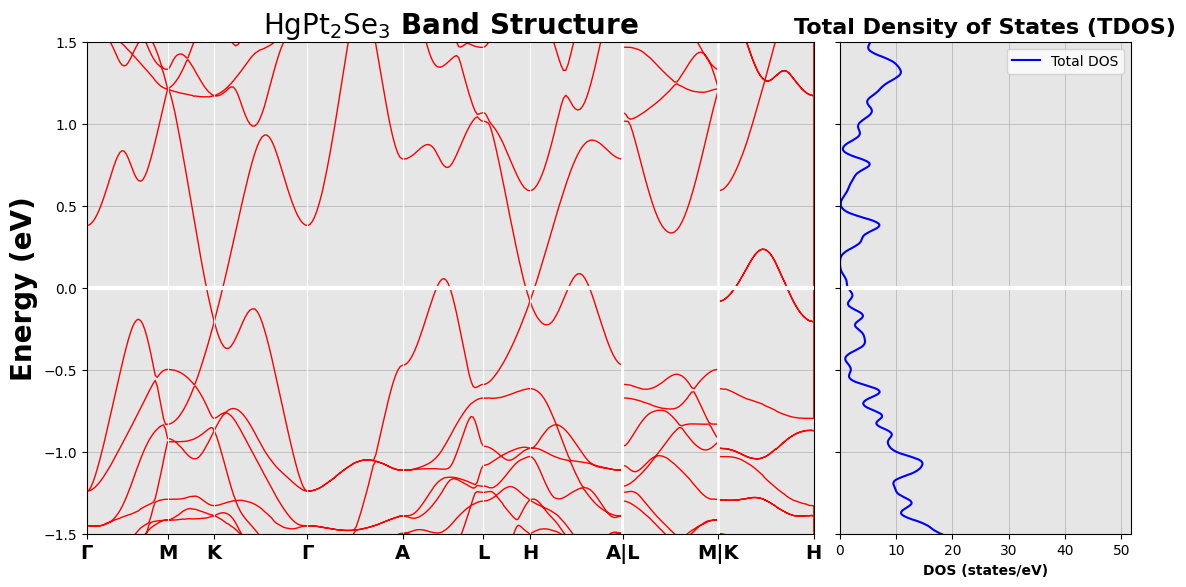

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec

# === Load Band Structure Data ===
bs_data = np.loadtxt("HgPtSeBS.dat")
#bs_data = np.loadtxt("")
k_points = bs_data[:, 0]
energies = bs_data[:, 1:]
num_bands = energies.shape[1]
fermi_level = 0.0

# Band edges
cbm = np.min(energies[energies > fermi_level])
vbm = np.max(energies[energies < fermi_level])
band_gap = cbm - vbm

# High-symmetry points
high_symmetry_labels = ['Γ', 'M', 'K', 'Γ', 'A', 'L', 'H', 'A|L', 'M|K', 'H']
spacing = 40
high_symmetry_points = [i * spacing for i in range(len(high_symmetry_labels))]
tick_positions = [k_points[i] for i in high_symmetry_points]

# === Load DOS Data ===
dos_data = np.loadtxt("HgPtSeDOS.dat")
if dos_data.shape[1] == 3:
    energy = dos_data[:, 0]
    dos_up = dos_data[:, 1]
    dos_down = dos_data[:, 2]
    spin_polarized = True
else:
    energy = dos_data[:, 0]
    dos = dos_data[:, 1]
    spin_polarized = False

# === Plotting ===
fig = plt.figure(figsize=(12, 6))
gs = GridSpec(1, 2, width_ratios=[2.5, 1], wspace=0.05)

# --- Band Structure ---
ax1 = fig.add_subplot(gs[0])
for i in range(num_bands):
    ax1.plot(k_points, energies[:, i], color='red', lw=1)

# Fermi level
#ax1.axhline(fermi_level, color='blue', linestyle='--', linewidth=1, label='Fermi Level (0 eV)')
ax1.axhline(fermi_level, color='white', linestyle='-', linewidth=3)

# Vertical symmetry lines
for i in high_symmetry_points:
    ax1.axvline(x=k_points[i], color='white', linestyle='-', linewidth=0.8)

# Additional symmetry markers
ax1.axvline(x=3.239, color='white', linestyle='-', linewidth=2)
ax1.axvline(x=3.822, color='white', linestyle='-', linewidth=2)

# Axis settings
ax1.set_xticks(tick_positions)
ax1.set_xticklabels(high_symmetry_labels, fontsize=14, weight='bold')
ax1.set_xlim([0, 4.405])
ax1.set_ylim([-1, 1])
ax1.set_ylabel("Energy (eV)", fontsize=20,weight='bold')
ax1.set_title(r"$\mathrm{HgPt_2Se_3}$ Band Structure", fontsize=20, weight='bold')
#ax1.legend(loc='upper right')
ax1.grid(True, linestyle='-', linewidth=0.5)
ax1.set_facecolor("#e6e6e6")

# --- DOS Plot ---
ax2 = fig.add_subplot(gs[1], sharey=ax1)
if spin_polarized:
    ax2.plot(dos_up, energy, label='Spin Up', color='hotpink')
    ax2.plot(-dos_down, energy, label='Spin Down', color='red')
    ax2.set_xlabel("DOS (states/eV, Up / -Down)", fontsize=14, weight='bold')
else:
    ax2.plot(dos, energy, label='Total DOS', color='blue')
    ax2.set_xlabel("DOS (states/eV)", fontsize=10, weight='bold')

ax2.axhline(y=0.0, color='white', linestyle='-', linewidth=3)
ax2.set_xlim(left=0)
ax2.set_ylim([-1.5, 1.5])
ax2.tick_params(axis='y', labelleft=False)
ax2.set_title("Total Density of States (TDOS)", fontsize=16, weight='bold')
ax2.grid(True, linestyle='-', linewidth=0.5)
ax2.legend()
ax2.set_facecolor("#e6e6e6")

# Final layout
fig.subplots_adjust(left=0.08, right=0.95, top=0.92, bottom=0.1)
plt.show()


## $\mathrm{Ta_2Te_2S}$ Quantum Spin Hall Insulator Band structure & DOS

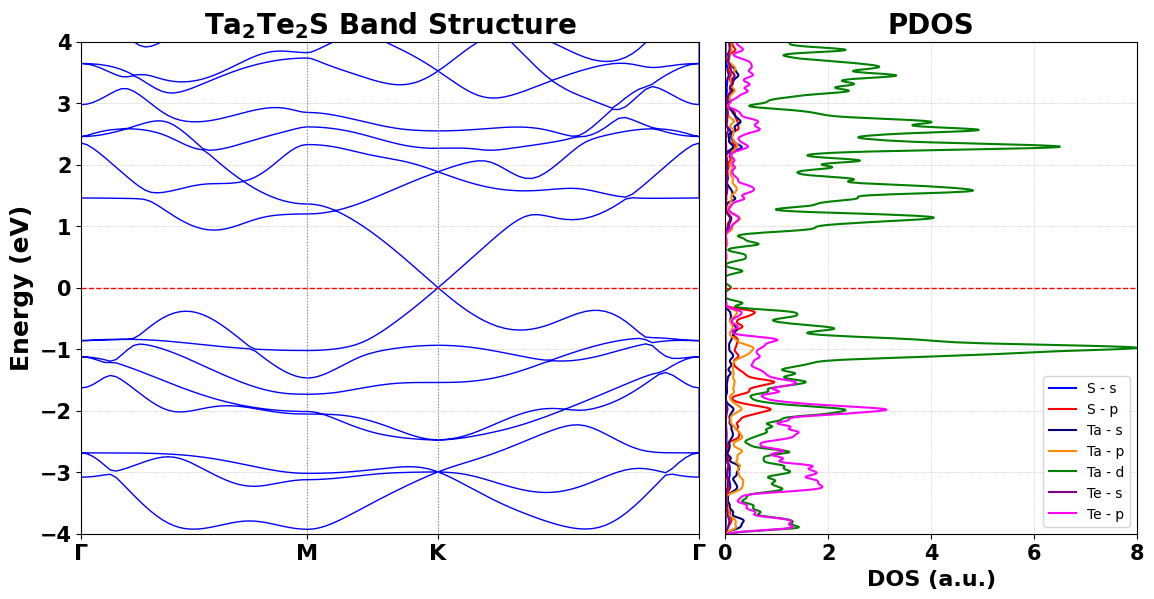

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec

# === Load Band Structure Data ===
bs_data = np.loadtxt("Ta2Te2S.dat")
k_points = bs_data[:, 0]
energies = bs_data[:, 1:]
num_bands = energies.shape[1]
fermi_level = 0.0

# Calculate VBM and CBM
cbm = np.min(energies[energies > fermi_level])
vbm = np.max(energies[energies < fermi_level])
band_gap = cbm - vbm

# Define high-symmetry points and labels
high_symmetry_labels = ['Γ', 'M', 'K', 'Γ']
spacing = 40
high_symmetry_points = [i * spacing for i in range(len(high_symmetry_labels))]
tick_positions = [k_points[i] for i in high_symmetry_points]

# === Load PDOS Data ===
columns = ['Energy', 's', 'py', 'pz', 'px', 'dxy', 'dyz', 'dz2', 'dxz', 'dx2', 'tot']
data_s = pd.read_csv("PDOS_S.dat", sep=r'\s+', names=columns, comment='#', skiprows=1)
data_ta = pd.read_csv("PDOS_Ta.dat", sep=r'\s+', names=columns, comment='#', skiprows=1)
data_te = pd.read_csv("PDOS_Te.dat", sep=r'\s+', names=columns, comment='#', skiprows=1)

# Compute total p and d orbitals
data_s['p'] = data_s['px'] + data_s['py'] + data_s['pz']
data_ta['p'] = data_ta['px'] + data_ta['py'] + data_ta['pz']
data_ta['d'] = data_ta['dxy'] + data_ta['dyz'] + data_ta['dz2'] + data_ta['dxz'] + data_ta['dx2']
data_te['p'] = data_te['px'] + data_te['py'] + data_te['pz']

# === Plotting Band + PDOS ===
fig = plt.figure(figsize=(12, 6))
gs = GridSpec(1, 2, width_ratios=[1.5, 1], wspace=0.05)

# --- Band Structure ---
ax1 = fig.add_subplot(gs[0])
for i in range(num_bands):
    ax1.plot(k_points, energies[:, i], color='blue', lw=1)

# Fermi level
ax1.axhline(fermi_level, color='red', linestyle='--', linewidth=1, label='Fermi Level (0 eV)')

# Vertical lines for high-symmetry points
for i in high_symmetry_points:
    ax1.axvline(x=k_points[i], color='gray', linestyle=':', linewidth=0.8)

# Example: mark direct gap region (optional)
ax1.axvline(x=6.45, color='white', linestyle='-', linewidth=3)
ax1.axvline(x=6.68, color='white', linestyle='-', linewidth=3)

# Axes settings
ax1.set_xticks(tick_positions)
ax1.set_xticklabels(high_symmetry_labels, fontsize=16, weight='bold')
ax1.set_xlim([0, 2.269])
ax1.set_ylim([-4, 4])
ax1.set_ylabel("Energy (eV)", fontsize=18, weight='bold')
ax1.set_title(r"$\mathbf{Ta_2Te_2S}$ Band Structure", fontsize=20, weight='bold')
ax1.tick_params(axis='y', labelsize=14)
ax1.grid(True, linestyle=':', linewidth=0.5)
ax1.tick_params(axis='y', labelsize=15)# for inc and making font of y axis points
for label in ax1.get_yticklabels():
    label.set_fontweight('bold')
# --- PDOS ---
ax2 = fig.add_subplot(gs[1], sharey=ax1)

# Plot PDOS lines
ax2.plot(data_s['s'], data_s['Energy'], label='S - s', color='blue')
ax2.plot(data_s['p'], data_s['Energy'], label='S - p', color='red')
ax2.plot(data_ta['s'], data_ta['Energy'], label='Ta - s', color='navy')
ax2.plot(data_ta['p'], data_ta['Energy'], label='Ta - p', color='darkorange')
ax2.plot(data_ta['d'], data_ta['Energy'], label='Ta - d', color='green')
ax2.plot(data_te['s'], data_te['Energy'], label='Te - s', color='purple')
ax2.plot(data_te['p'], data_te['Energy'], label='Te - p', color='magenta')

# Format PDOS plot
ax2.axhline(y=0, color='red', linestyle='--', linewidth=1)
ax2.set_xlim([0,8])
ax2.set_xlabel("DOS (a.u.)", fontsize=16, weight='bold')
ax2.set_title("PDOS", fontsize=20, weight='bold')
ax2.tick_params(axis='x', labelsize=14)
ax2.tick_params(axis='y', left=False, labelleft=False)
ax2.grid(True, linestyle=':', linewidth=0.5)
ax2.legend(fontsize=10, loc='best')
ax2.tick_params(axis='x', labelsize=15)
for label in ax2.get_xticklabels():
    label.set_fontweight('bold')

# Adjust layout and show
fig.subplots_adjust(left=0.07, right=0.95, top=0.92, bottom=0.1)
plt.show()
